# Explore here

In [845]:
# Your code here
import pandas as pd

Ruta_Arch = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

total_data= pd.read_csv(Ruta_Arch, sep = ",")
total_data.head(200)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
195,19,male,30.590,0,no,northwest,1639.56310
196,39,female,32.800,0,no,southwest,5649.71500
197,45,female,28.600,2,no,southeast,8516.82900
198,51,female,18.050,0,no,northwest,9644.25250


In [846]:
total_data.shape

(1338, 7)

In [847]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [848]:
#Datos
total_data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [849]:

#===============================================================================
# Elimino Duplicados
#===============================================================================
total_data2 = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [850]:

#===============================================================================
#Esta es la descripcion Estadistica de las Columnas
#===============================================================================
total_data2.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [851]:
total_data.shape

(1338, 7)

In [852]:
#Solo un Duplicado 

<Axes: ylabel='charges'>

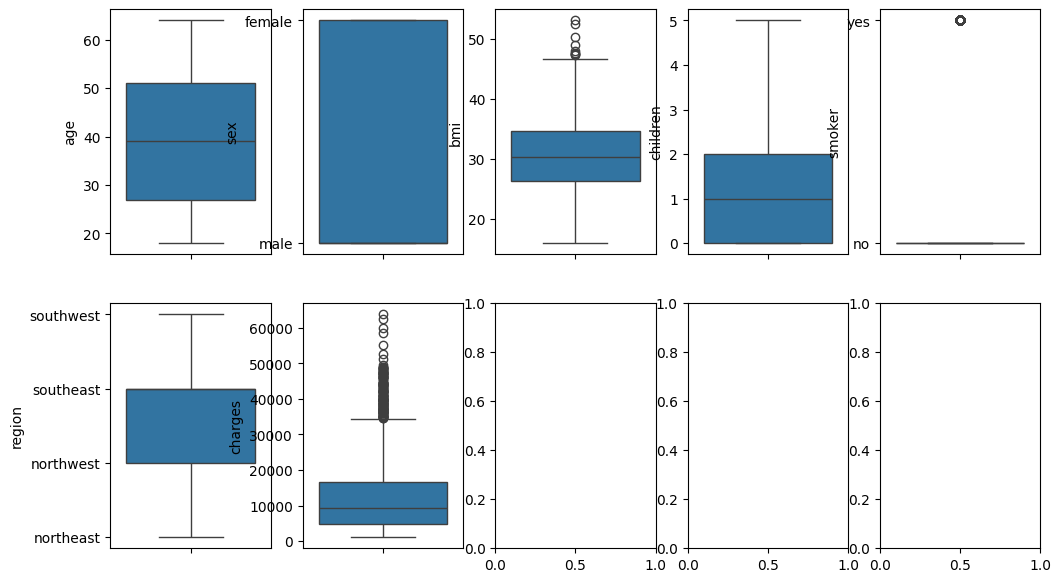

In [853]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 5, figsize=(12, 7))

sns.boxplot(ax=axes[0, 0], data=total_data, y = "age")
sns.boxplot(ax=axes[0, 1], data=total_data, y = "sex")
sns.boxplot(ax=axes[0, 2], data=total_data, y = "bmi")
sns.boxplot(ax=axes[0, 3], data=total_data, y = "children")
sns.boxplot(ax=axes[0, 4], data=total_data, y = "smoker")
sns.boxplot(ax=axes[1, 0], data=total_data, y = "region")
sns.boxplot(ax=axes[1, 1], data=total_data, y = "charges")

In [854]:
total_data2=total_data

In [855]:
from sklearn.preprocessing import LabelEncoder

# Creamos codificadores
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()
# Aplicamos la codificación
total_data2["sex_num"] = le_sex.fit_transform(total_data2["sex"])
total_data2["smoker_num"] = le_smoker.fit_transform(total_data2["smoker"])
total_data2["region_num"] = le_region.fit_transform(total_data2["region"])

In [856]:
total_data2.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num,region_num
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [857]:
total_data2.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num,region_num
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [858]:

print(dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_))))
print(dict(zip(le_smoker.classes_, le_smoker.transform(le_smoker.classes_))))
print(dict(zip(le_region.classes_, le_region.transform(le_region.classes_))))

{'female': np.int64(0), 'male': np.int64(1)}
{'no': np.int64(0), 'yes': np.int64(1)}
{'northeast': np.int64(0), 'northwest': np.int64(1), 'southeast': np.int64(2), 'southwest': np.int64(3)}


In [859]:
total_data3 = total_data2.drop(["sex", "smoker", "region"], axis=1)

In [860]:
total_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   charges     1338 non-null   float64
 4   sex_num     1338 non-null   int64  
 5   smoker_num  1338 non-null   int64  
 6   region_num  1338 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [861]:
from sklearn.preprocessing import MinMaxScaler
ElementEscalador = MinMaxScaler()
total_data3["region_num_scaled"] = ElementEscalador.fit_transform(total_data3[["region_num"]])

In [862]:
total_data5= total_data3.drop(["region_num"], axis=1)
total_data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1338 non-null   int64  
 1   bmi                1338 non-null   float64
 2   children           1338 non-null   int64  
 3   charges            1338 non-null   float64
 4   sex_num            1338 non-null   int64  
 5   smoker_num         1338 non-null   int64  
 6   region_num_scaled  1338 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 73.3 KB


In [863]:
total_data5.head()

,age,bmi,children,charges,sex_num,smoker_num,region_num_scaled
0,19,27.900,0,16884.92400,0,1,1.000000
1,18,33.770,1,1725.55230,1,0,0.666667
2,28,33.000,3,4449.46200,1,0,0.666667
3,33,22.705,0,21984.47061,1,0,0.333333
4,32,28.880,0,3866.85520,1,0,0.333333


In [864]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = total_data5.drop("charges", axis = 1)
y = total_data5["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_Fase_02 = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_Fase_02 = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

In [865]:
X_train_Fase_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1070 non-null   float64
 1   bmi         1070 non-null   float64
 2   children    1070 non-null   float64
 3   smoker_num  1070 non-null   float64
dtypes: float64(4)
memory usage: 33.6 KB


In [866]:
f_values, p_values = f_regression(X_train, y_train)
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'F-value': f_values,
    'p-value': p_values
})
print(feature_scores.sort_values("F-value", ascending=False))

             Feature      F-value        p-value
4         smoker_num  1659.952101  1.036077e-219
0                age    92.070905   5.694481e-21
1                bmi    43.265710   7.467476e-11
2           children     5.547503   1.868717e-02
3            sex_num     3.457075   6.325648e-02
5  region_num_scaled     0.000015   9.968873e-01


In [867]:
print("Columnas seleccionadas:", selected_columns.tolist())

Columnas seleccionadas: ['age', 'bmi', 'children', 'smoker_num']


sex_num y region_num_scaled tienen bajo el "F-Valiue" contra la Variable Objetivo y por esos quedan fuera

## Estudio Bi-Variable

In [868]:
train_Fase_03=X_train_Fase_02.copy()
test_Fase_03=X_test_Fase_02.copy()



In [869]:
train_Fase_03["charges"] = y_train.values
test_Fase_03["charges"] = y_test.values



In [870]:
#Data Limpia y Total
total_data = pd.concat([train_Fase_03, test_Fase_03])
total_data.head()

,age,bmi,children,smoker_num,charges
0,46.0,19.95,2.0,0.0,9193.83850
1,47.0,24.32,0.0,0.0,8534.67180
2,52.0,24.86,0.0,0.0,27117.99378
3,39.0,34.32,5.0,0.0,8596.82780
4,54.0,21.47,3.0,0.0,12475.35130


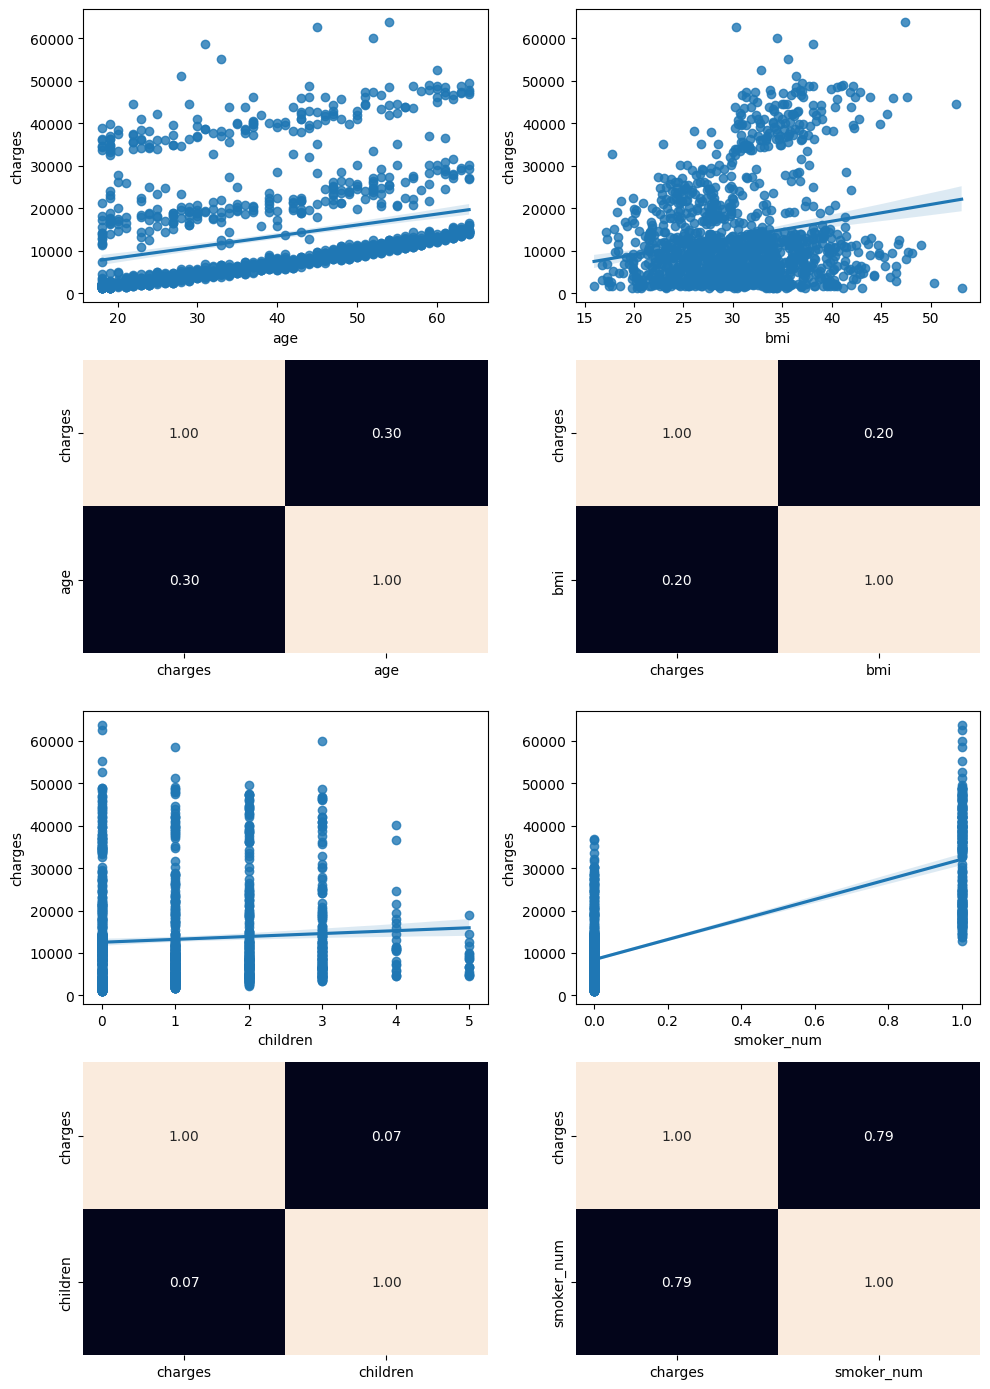

In [871]:
## Analisis Bi-Valiable
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_num", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_num"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [872]:
X_train = X_train_Fase_02
y_train = y_train
X_test = X_test_Fase_02
y_test = y_test

In [873]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1070 non-null   float64
 1   bmi         1070 non-null   float64
 2   children    1070 non-null   float64
 3   smoker_num  1070 non-null   float64
dtypes: float64(4)
memory usage: 33.6 KB


In [874]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1070 entries, 560 to 1126
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1070 non-null   float64
dtypes: float64(1)
memory usage: 16.7 KB


In [875]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [876]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): -12117.075074107712
Coefficients (b1, b2): [  257.07115795   327.52263109   427.19997095 23653.21164629]


In [877]:
y_pred = model.predict(X_test)
y_pred

array([ 8550.90921341,  6969.71599759, 36794.13661808,  9421.86824203,
       26875.01095777, 11101.26514111,   141.44896605, 16750.22436643,
         743.78364016, 11157.63586446, 28521.42342227,  9296.15962897,
        5456.5831315 , 38513.59317763, 40362.63211366, 37226.61219261,
       15312.47750251, 36042.83494384,  9322.40796481, 31395.64230108,
        4273.49461256, 10468.62243337,  2723.96491222,  6575.5287315 ,
       11228.01912269, 12468.20703945, 14803.23875441,  6062.13408867,
        9531.77127863,  2381.73787018,  9470.9842188 , 12959.38866372,
        4702.13338911,  3410.73606761,  4819.65393639, 12488.16536441,
        2355.2166747 ,  9157.11135848, 33234.15784494, 32746.69484389,
        4270.42403098,  4233.52485656, 14431.41993531, 11388.84943272,
        8929.60714179, 12484.19557109,  5150.40526844,  3550.1037231 ,
       35652.7853174 ,  9280.12457197, 15967.47938558,  2556.74541518,
       12158.95859481,  1066.73450634, 13555.51395976, 12107.63444981,
      

In [878]:
y_pred = pd.Series(y_pred)

In [879]:
y_pred.head()

0     8550.909213
1     6969.715998
2    36794.136618
3     9421.868242
4    26875.010958
dtype: float64

In [880]:
# Predicciones
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 33981653.95019776
MAE: 4213.798594527248
R²: 0.7811147722517886
